In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests

In [3]:
 image = requests.get('https://www.planetnatural.com/wp-content/uploads/2012/12/potato-blight.jpg')
file = open("test_img.jpg", "wb")
file.write(image.content)
file.close()

In [4]:
df = pd.read_csv('/content/Symptom and Treatment.csv')

In [5]:
def augment_image(img_path):
  img = imread(img_path)
  img = tf.image.resize(img, [256,256], method='nearest')
  plt.imshow(img)
  img = np.reshape(img, (1,256,256,3))
  img = img / 255
  return img 

In [6]:
def predict(img):
  pred = model.predict(img)
  disease = np.where(pred == pred.max())[1][0]
  output = [df.loc[disease].Disease, df.loc[disease].Symptom, df.loc[disease].Treatment]
  return output

In [7]:
img_path = '/content/test_img.jpg'

In [8]:
model = tf.keras.models.load_model('/content/drive/MyDrive/model_resnet152V2(1).h5')

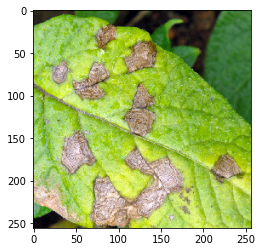

In [9]:
img = augment_image(img_path)

In [10]:
output = predict(img)

In [11]:
output

['Potato Early Blight',
 'Early blight rarely affects young plants. Symptoms first occur on the lower or oldest leaves of the plant. Dark, brown spots appear on this older foliage and, as the disease progresses, enlarge, taking on an angular shape. These lesions often look like a target and, in fact, the disease is sometimes referred to as target spot.',
 'Plant potato varieties that are resistant to the disease, late maturing are more resistant than early maturing varieties.']